# Predictive Modeling Example

**Week04, Polynomial Example Model Fitting**

ISM6136

&copy; 2023 Dr. Tim Smith


<a target="_blank" href="https://colab.research.google.com/github/prof-tcsmith/dm-f23/blob/main/W04/W04.04_model3-polynomial.ipynb#offline=1">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---


## Step 1: Import a number of libraries that we expect to use

In [1]:
# if running on colab, you may need to uncomment the following lines
# if you get an error saying that the module is not found
#!pip install matplotlib
#!pip install numpy
#!pip install pandas
#!pip install sklearn
#!pip install ipympl

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

np.random.seed(1) # set this to ensure the results are repeatable. 

# this is a notebook 'MAGIC' that will allow for creation of inline plots (this is the defaul, so often not necessary)
%matplotlib inline

%matplotlib widget 

## Step 2: Load the given data that we will model

In [4]:
df = pd.read_csv('./c02_dataset_4.csv')

df.head(10)

,X,y
0,4.90,46.45500
1,2.39,38.71315
2,-4.48,114.04560
3,-6.11,178.89315
4,-20.30,600.91500
5,6.08,40.95960
6,-3.54,76.57740
7,1.53,-69.96365
8,5.01,77.56515
9,-7.86,245.15940


Seperate out the input m(X) and the target (y)

In [67]:
X = df[['X']]
y = df[['y']]

## Step 3: Explore the given data

Explore the data using a scatterplot.

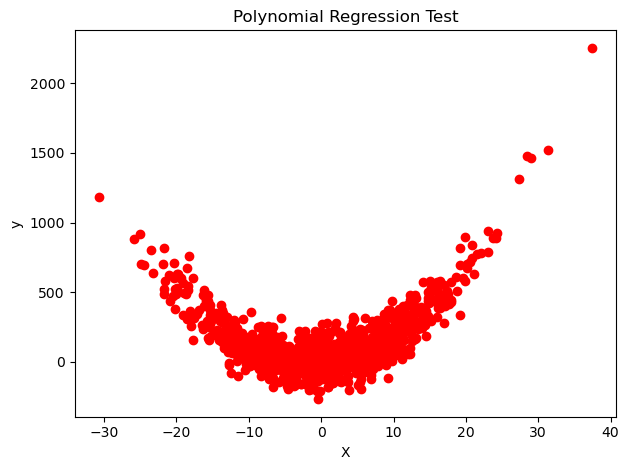

In [68]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

# Using the train-test-split model on this dataset




# # Step-1 Explore the number of rows and columns in the dataset


In [30]:
df.shape

(1000, 2)

# # Step-2 Identify missing data 

In [31]:
df.isna().sum()
# There are no missing values in this data set

X    0
y    0
dtype: int64

# # Step-3 Partition data into training and validation sets 

In [32]:
'''Split the dataset into training (70%) and validation (30%) sets.
Randomly sample 70% of the dataset into a new data frame train_data. The remaining 30% serve as validation
'''
train_data= df.sample(frac=0.7, random_state=1)
valid_data = df.drop(train_data.index)

# # Step-4 Developing a Predictive Model  Using a Linear Model

In [33]:
# Normalize the data 
scaler = StandardScaler()
train_data = pd.DataFrame(scaler.fit_transform(train_data),
                       index=train_data.index, columns=train_data.columns)
valid_data = pd.DataFrame(scaler.transform(valid_data),
                       index=valid_data.index, columns=valid_data.columns)

# Using a linear model to try to fit the data

model = LinearRegression()
Input = ['X']
target = ['y']
predicted = ['PREDICTED']

X_train = train_data[Input]
y_train = train_data[target]


X_valid = valid_data[Input]
y_valid = valid_data[target]

## Train the model on the training data 
model.fit(X_train, y_train)

## Use the model to predict the target values using the input values from the validation dataset
y_valid[predicted] = model.predict(X_valid)
y_valid.head()

,y,PREDICTED
7,-0.913516,0.034030
10,0.877842,0.239496
15,-1.300382,-0.067276
20,0.569270,-0.366200
21,0.068527,-0.191412


# # Step-5 Calculating the mean square error of this linear model

In [34]:

mean_squared_error(y_valid[target], y_valid[predicted]) 


0.9536615245521369

# # Analyse the results of the linear model

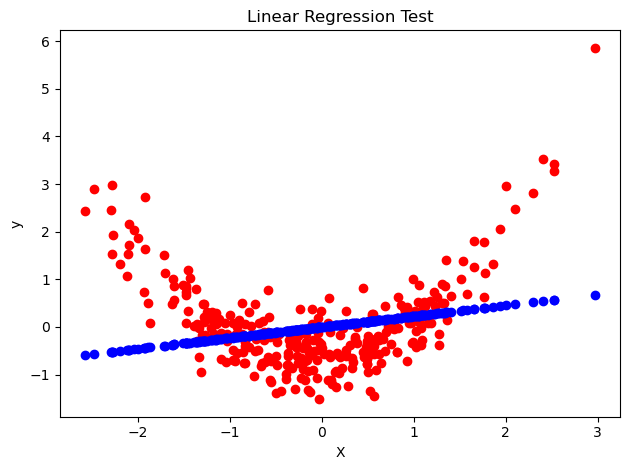

In [38]:
fig = plt.figure()
ax = fig.add_subplot()

# Fit the linear model using the input and output values from the training dataset
lin_reg1=LinearRegression().fit(train_data[Input],train_data[target])


ax.scatter(valid_data[Input], valid_data[target], color='red')

# predict the y values from the x values from the validation dataset and check the scatter plot
ax.scatter(valid_data[Input],lin_reg1.predict(valid_data[Input]),color='blue')




ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Linear Regression Test")
plt.tight_layout()
plt.show()

In [39]:
## Calculate the root mean square error of this model
r2 = lin_reg1.score(valid_data[Input], valid_data[target])
print(r2)

-0.040555342515058435


### We can see from the mean sqaure error and the scatter plot  that the linear model is not a good fit for this data set

# # Step-6 Using a polynomial model instead of a linear model

In [21]:
Input = ['X']
target = ['y']
predicted = ['PREDICTED']

## Split the dataset into test and training data
train_data= df.sample(frac=0.7, random_state=1)
valid_data = df.drop(train_data.index)

# First normalize the dataset
scaler = StandardScaler()
train_data = pd.DataFrame(scaler.fit_transform(train_data),
                       index=train_data.index, columns=train_data.columns)
valid_data = pd.DataFrame(scaler.transform(valid_data),
                       index=valid_data.index, columns=valid_data.columns)

X_train = train_data[Input]
y_train = train_data[target]


X_valid = valid_data[Input]
y_valid = valid_data[target]


# Train the polynomial model on the training data 

X_poly_train=PolynomialFeatures(degree=2).fit_transform(X_train)
X_poly_validate = PolynomialFeatures(degree=2).fit_transform(X_valid)
model=LinearRegression().fit(X_poly_train,y_train)

In [22]:
## Predict the values of the validation dataset

y_valid[predicted] = model.predict(X_poly_validate)

In [23]:
y_valid.head()

,y,PREDICTED
7,-0.913516,-0.556831
10,0.877842,0.256359
15,-1.300382,-0.598744
20,0.569270,0.659739
21,0.068527,-0.326794


In [24]:
## find the mean square error of the polynomial model

mean_squared_error(y_valid[target], y_valid[predicted]) 

0.20127827961611908

# # Analyze the results of the polynomial model

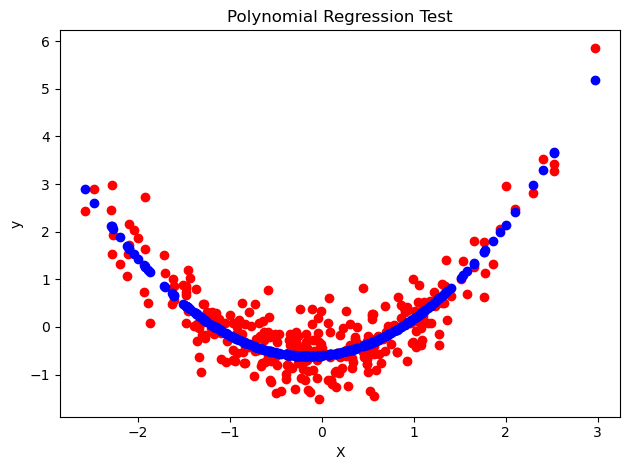

In [28]:
fig = plt.figure()
ax = fig.add_subplot()

## fit the polynomial model using the training dataset
lin_reg2=LinearRegression().fit(X_poly_train,train_data[target])

ax.scatter(valid_data[Input], valid_data[target], color='red')

# Use the validation input values to predict the output values from the fitted polynomial model and plot a scatter plot 
ax.scatter(valid_data[Input],lin_reg1.predict(X_poly_validate),color='blue')




ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

In [29]:
## Calculate the r squared value of this model 
lin_reg2.score(X_poly_validate, valid_data[target])

0.7803820498209244

# # The mean square error of the polynomial model is much less than the linear model. The R square value of the polynomial model is much more than the linear model. By using the train-test split model we can be more certain about the accuracy of the model as we have trained and tested the model using two different datasets. In the previous method we were not splitting the given dataset, we were just trying to fit various models in the given dataset and get the difference between the target and predicted values.  
 